./p5 -t trace.1t.long.txt -p msi -n 1 -cache 16 5 4 >> results/exp5/05.06-14_23_07/msi-01-16-05-04.out
./p5 -t trace.2t.long.txt -p msi -n 2 -cache 16 5 4 >> results/exp5/05.06-14_23_07/msi-02-16-05-04.out
./p5 -t trace.4t.long.txt -p msi -n 4 -cache 16 5 4 >> results/exp5/05.06-14_23_07/msi-04-16-05-04.out
./p5 -t trace.1t.long.txt -p msi -n 1 -cache 16 6 4 >> results/exp5/05.06-14_23_07/msi-01-16-06-04.out
./p5 -t trace.2t.long.txt -p msi -n 2 -cache 16 6 4 >> results/exp5/05.06-14_23_07/msi-02-16-06-04.out
./p5 -t trace.4t.long.txt -p msi -n 4 -cache 16 6 4 >> results/exp5/05.06-14_23_07/msi-04-16-06-04.out
./p5 -t trace.1t.long.txt -p msi -n 1 -cache 16 7 4 >> results/exp5/05.06-14_23_07/msi-01-16-07-04.out
./p5 -t trace.2t.long.txt -p msi -n 2 -cache 16 7 4 >> results/exp5/05.06-14_23_07/msi-02-16-07-04.out
./p5 -t trace.4t.long.txt -p msi -n 4 -cache 16 7 4 >> results/exp5/05.06-14_23_07/msi-04-16-07-04.out
./p5 -t trace.1t.long.txt -p msi -n 1 -cache 16 8 4 >> results/exp5/05.06

sh: ./p5: No such file or directory
sh: ./p5: No such file or directory
sh: ./p5: No such file or directory
sh: ./p5: No such file or directory
sh: ./p5: No such file or directory
sh: ./p5: No such file or directory
sh: ./p5: No such file or directory
sh: ./p5: No such file or directory
sh: ./p5: No such file or directory
sh: ./p5: No such file or directory
sh: ./p5: No such file or directory
sh: ./p5: No such file or directory
sh: ./p5: No such file or directory
sh: ./p5: No such file or directory
sh: ./p5: No such file or directory
sh: ./p5: No such file or directory
sh: ./p5: No such file or directory
sh: ./p5: No such file or directory
sh: ./p5: No such file or directory
sh: ./p5: No such file or directory
sh: ./p5: No such file or directory


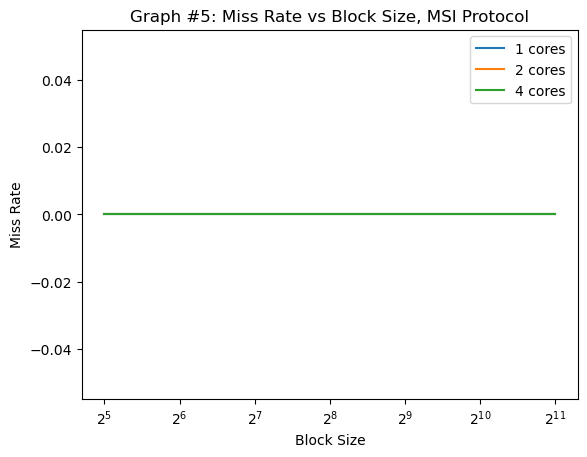

In [1]:
#!/usr/bin/python3

import sys
import os
import time
import matplotlib.pyplot as plt

# associtivity range
assoc_range = [4]
# block size range
bsize_range = [b for b in range(5, 12)]
# capacity range
cap_range = [c for c in range(16, 17)]
# number of cores (1, 2, 4)
cores = [1, 2, 4]
# coherence protocol: (none, vi, or msi)
protocol='msi'

expname='exp5'
figname='graph5.png'


def get_stats(logfile, key):
    for line in open(logfile):
        if line[2:].startswith(key):
            line = line.split()
            return float(line[1])
    return 0

def run_exp(logfile, core, cap, bsize, assoc):
    trace = 'trace.%dt.long.txt' % core
    cmd="./p5 -t %s -p %s -n %d -cache %d %d %d >> %s" % (
            trace, protocol, core, cap, bsize, assoc, logfile)
    print(cmd)
    os.system(cmd)

def graph():
    timestr = time.strftime("%m.%d-%H_%M_%S")
    folder = "results/"+expname+"/"+timestr+"/"
    os.system("mkdir -p "+folder)

    miss_rate = {}

    for a in assoc_range:
        for b in bsize_range:
            for c in cap_range:
                for d in cores:
                    logfile = folder+"%s-%02d-%02d-%02d-%02d.out" % (
                            protocol, d, c, b, a)
                    run_exp(logfile, d, c, b, a)
                    if d not in miss_rate:
                        miss_rate[d] = []
                    miss_rate[d].append(get_stats(logfile, 'miss_rate')/100)

    plots = []
    for core in cores:
        p,=plt.plot([2**i for i in bsize_range], miss_rate[core])
        plots.append(p)
    plt.legend(plots, ['%d cores' % a for a in cores])
    plt.xscale('log', base=2)
    plt.title('Graph #5: Miss Rate vs Block Size, MSI Protocol')
    plt.xlabel('Block Size')
    plt.ylabel('Miss Rate')
    # plt.savefig(figname)
    plt.show()

graph()
